# Code Smells

# Overview

### Bad Smells que não ocorreram

In [2]:
# 2, 3, 4, 8, 12, 13, 16, 21, 22, 24, 25, 28, 29, 30, 32, 37, 39, 43
# 18 Bad Smells

### Top 10 Bad Smells que mais ocorreram

In [3]:
# 1o - 23 -> 2119 - Restrict use of DEFAULT clause in parameter declarations. Severity: 2
# 2o - 34 -> 1484 - Bind Variable Rule All queries must leverage bind variables in where clause. Severity: 2
# 3o - 1  -> 1104 - Avoid concatination of two quoted strings. Severity: 1
# 4o - 10 -> 1021 - Avoid multiple declarations of labels and variables. Severity: 1
# 5o - 19 -> 954  - Avoid CHAR, NCHAR, VARCHAR, VARCHAR2, NVARCHAR2 declarations with no precision. Severity: 1
# 6o - 47 -> 781  - Use of NULL statements. Severity: 1
# 7o - 33 -> 272  - Bind Variable Rule All queries  must leverage bind variables in select clause. Severity: 2
# 8o - 41 -> 240  - Always use a string variable to execute dynamic SQL. Severity: 1
# 9o - 7  -> 235  - Explicitly mention the column aliases using the AS keyword. Severity: 2
# 10o- 48 -> 202  - Avoid coding procedures with no parameters. Severity: 1

### Importando Bibiotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Obtendo o primeiro DataFrame

In [5]:
# extrai os dados
df=pd.read_csv('DATASET2.csv', sep=',',header=None)

# inverte a matriz
transposto = df.T

# dimensoes com as labels [21 rows x 51 columns]
# remove a primeira coluna (nome dos projetos)
# remove a primeira linha (id dos bad smells) 
matriz = transposto.values.reshape(21,51)
# 20 x 50
matriz = list(matriz[1:,1:].astype(np.int))

### Outliers entre Bad Smells de um mesmo projeto

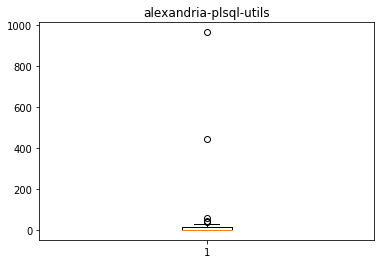

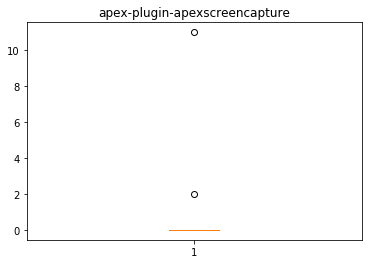

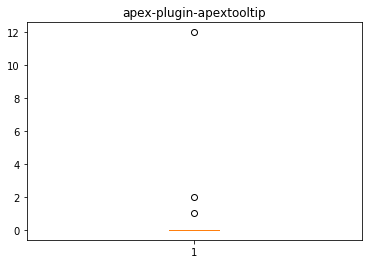

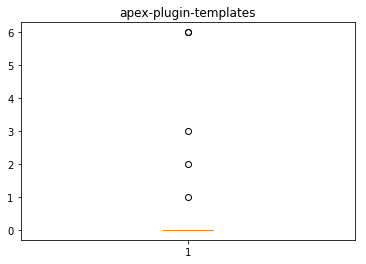

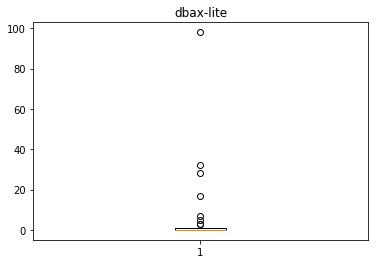

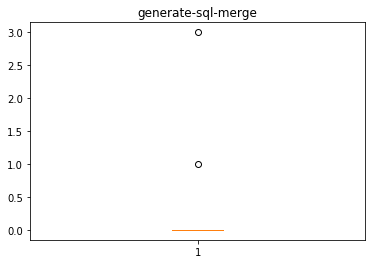

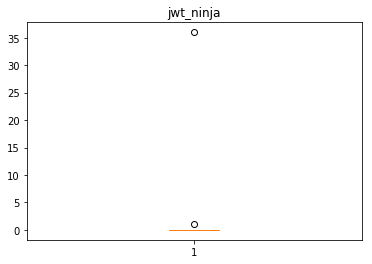

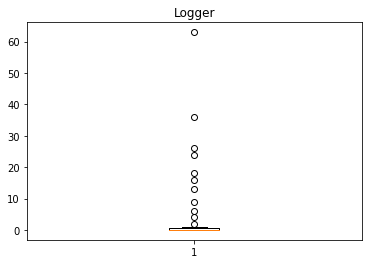

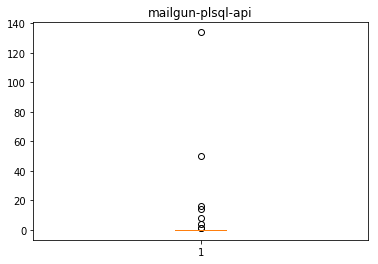

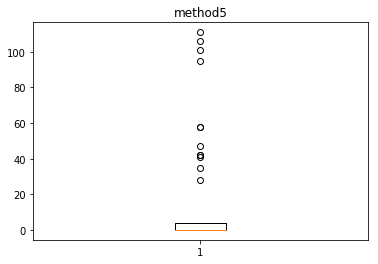

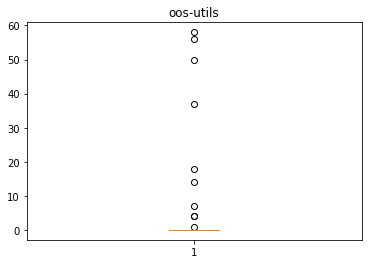

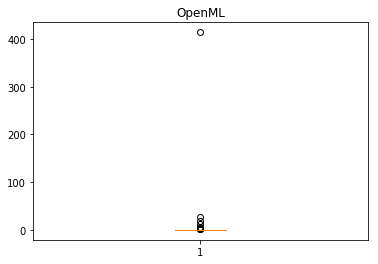

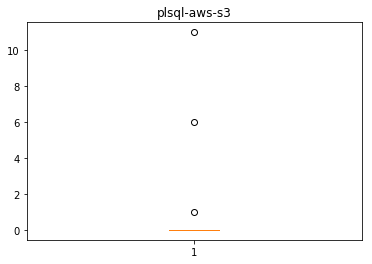

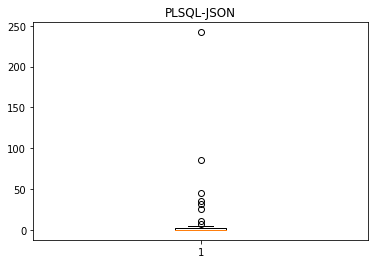

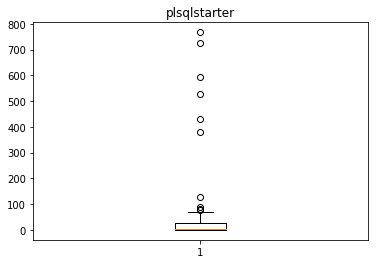

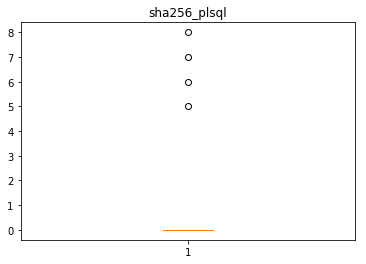

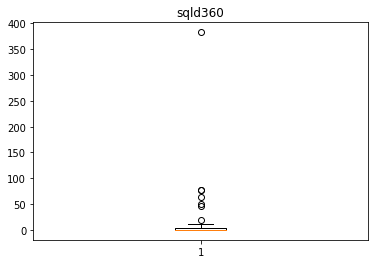

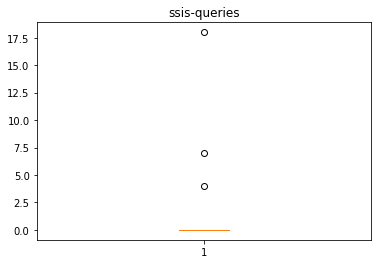

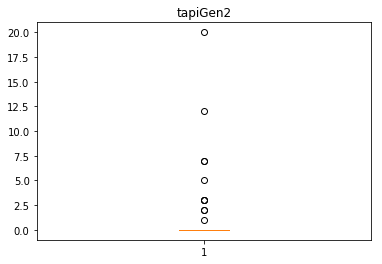

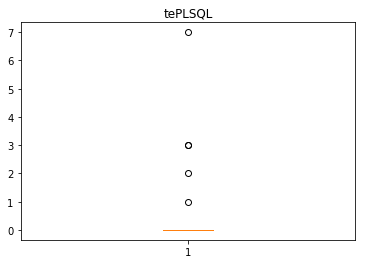

In [6]:
# deteccao de outliers entre badsmells de um projeto
projetos = ['alexandria-plsql-utils', 'apex-plugin-apexscreencapture', 'apex-plugin-apextooltip',
           'apex-plugin-templates', 'dbax-lite', 'generate-sql-merge',
           'jwt_ninja', 'Logger', 'mailgun-plsql-api', 'method5',
           'oos-utils', 'OpenML', 'plsql-aws-s3', 'PLSQL-JSON', 'plsqlstarter',
           'sha256_plsql', 'sqld360', 'ssis-queries', 'tapiGen2', 'tePLSQL']
count = 0
for linha in matriz:
    plt.title(projetos[count])
    count = count+1
    plt.boxplot(linha)
    plt.show()

### Outliers entre cada Bad Smell

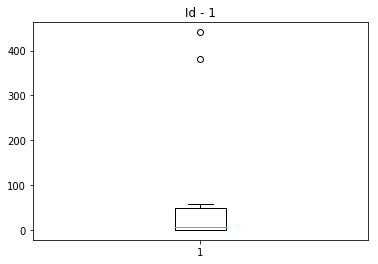

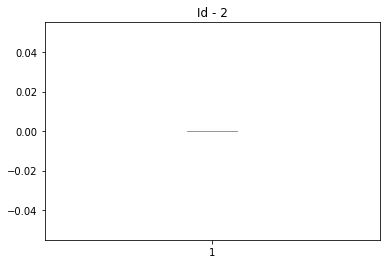

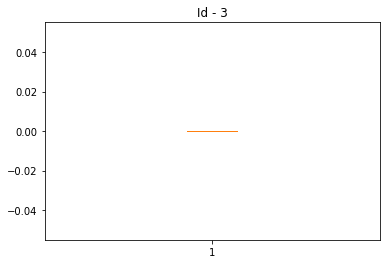

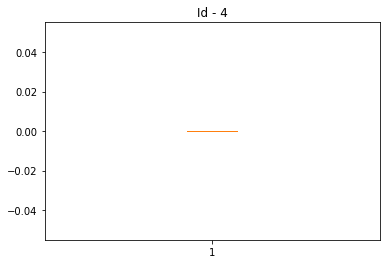

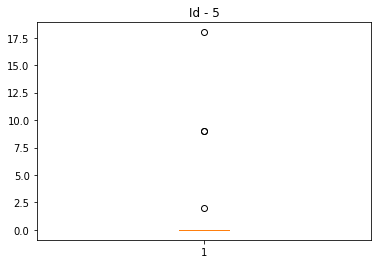

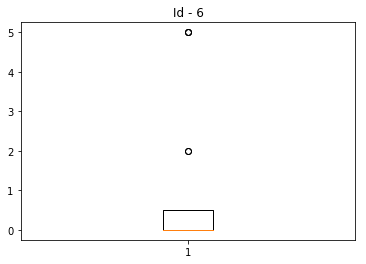

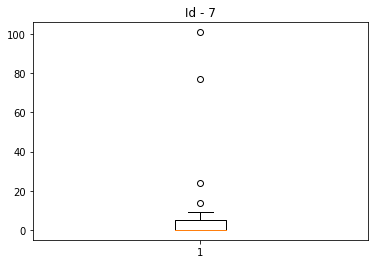

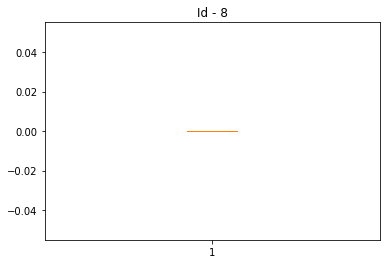

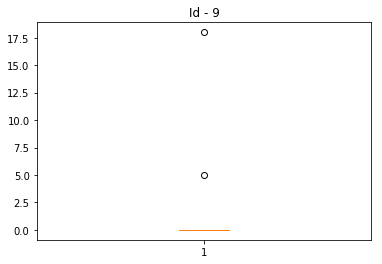

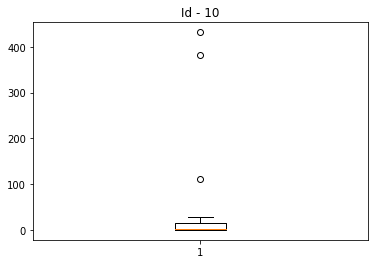

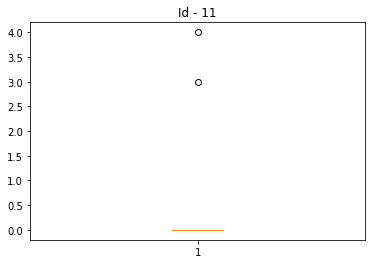

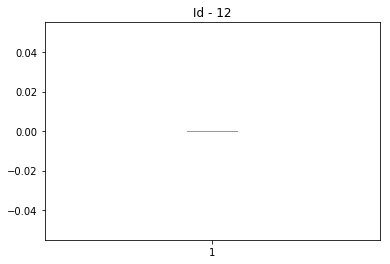

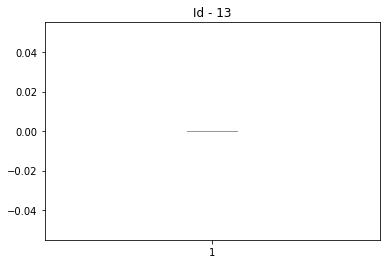

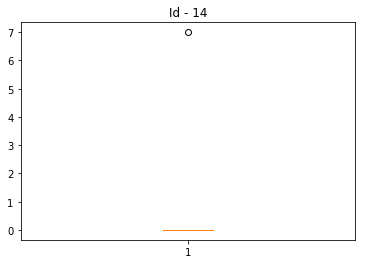

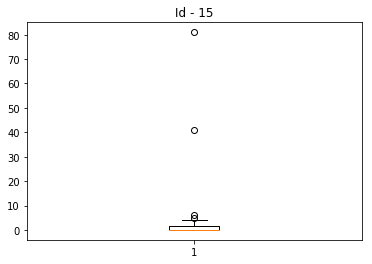

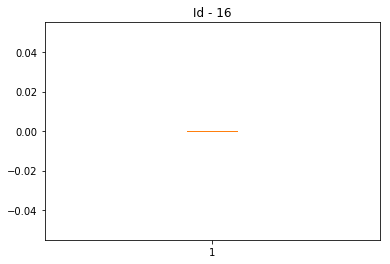

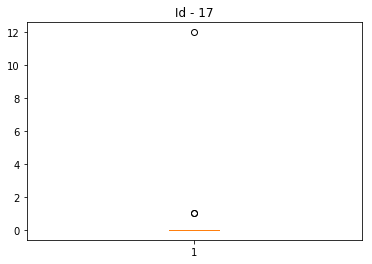

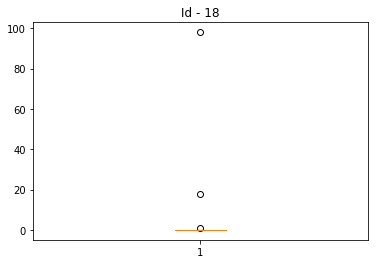

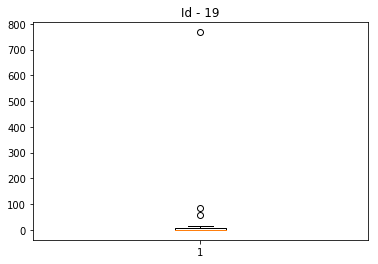

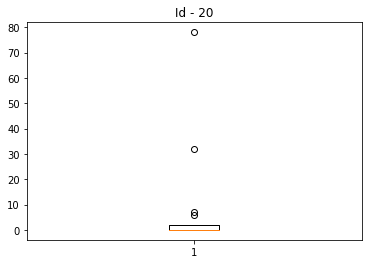

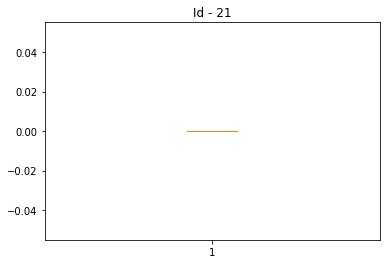

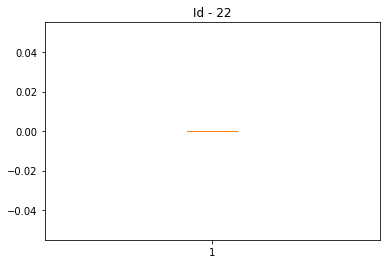

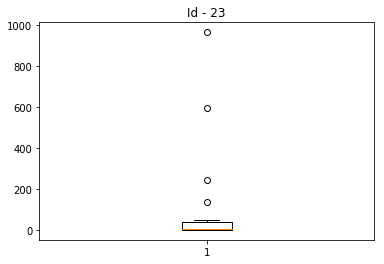

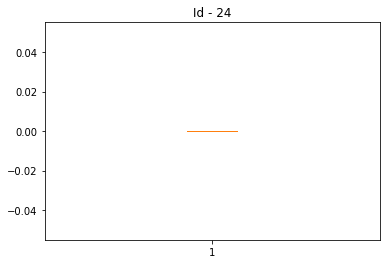

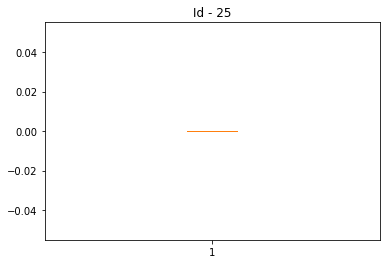

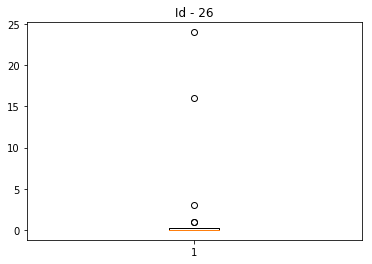

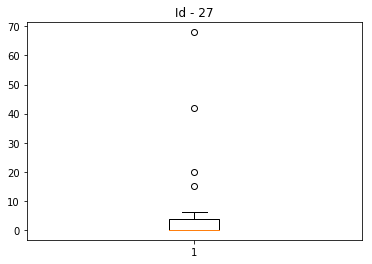

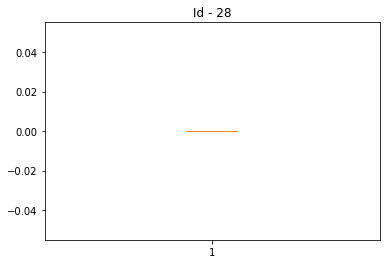

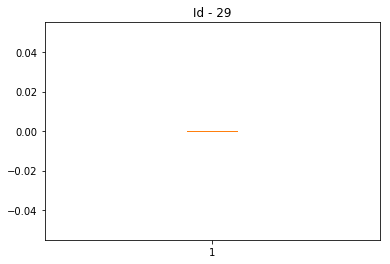

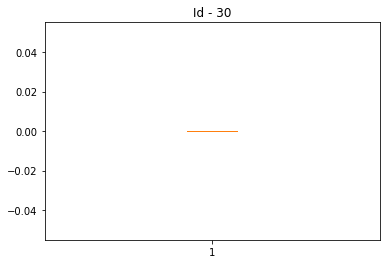

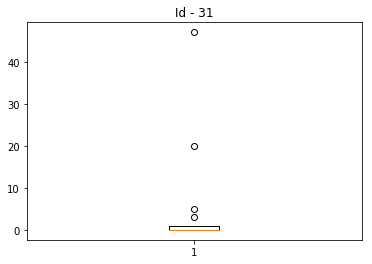

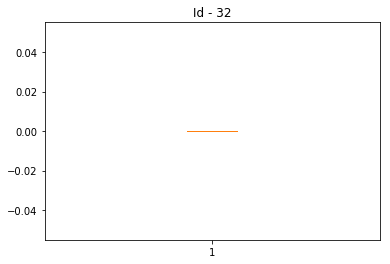

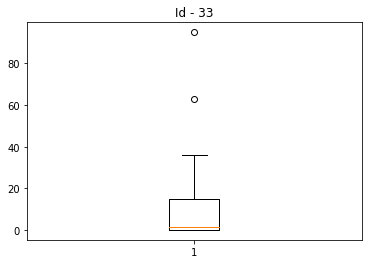

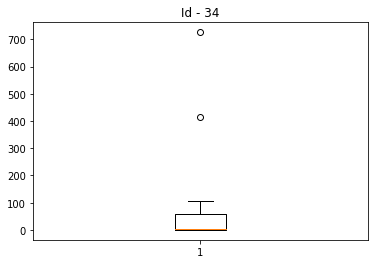

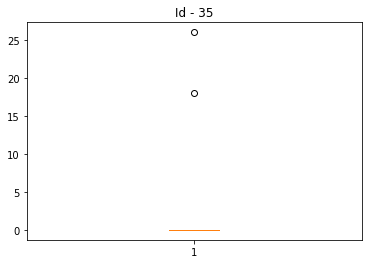

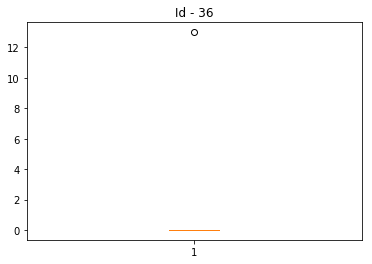

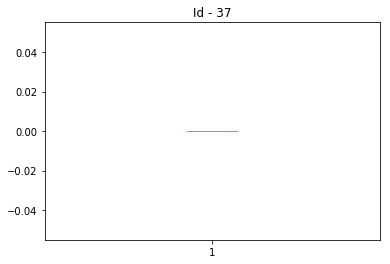

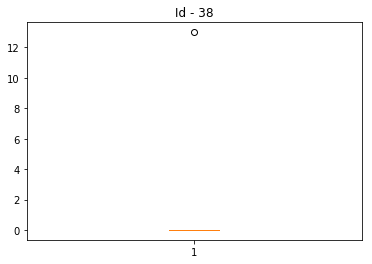

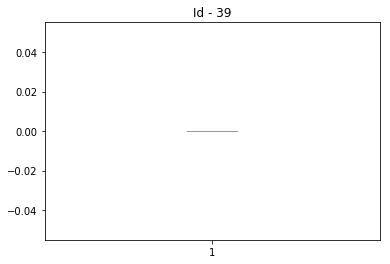

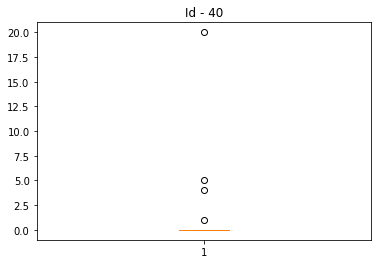

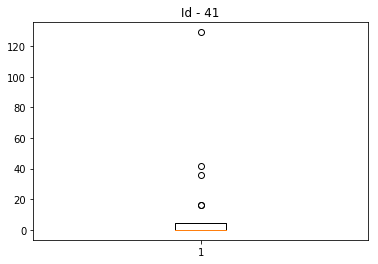

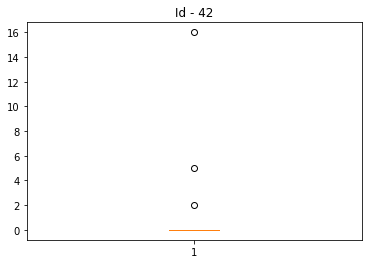

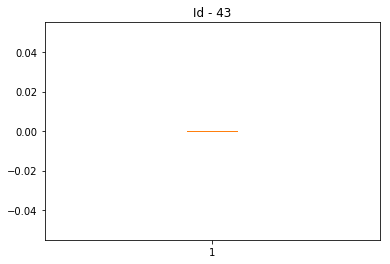

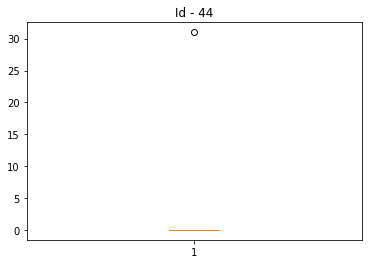

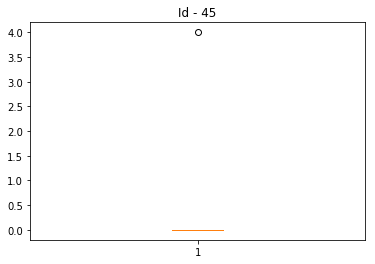

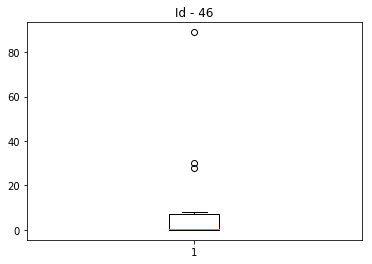

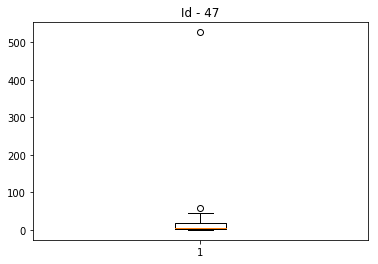

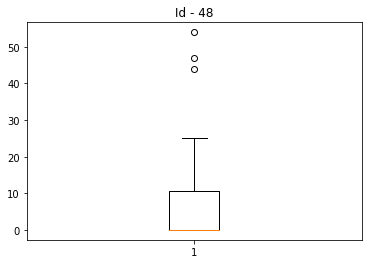

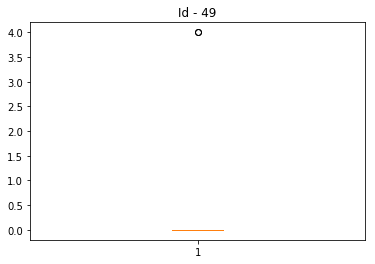

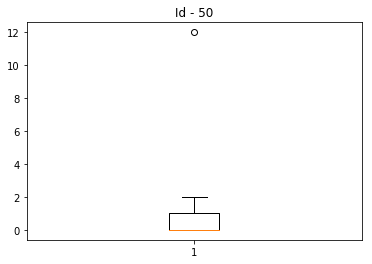

In [7]:
# deteccao de outliers entre badsmells
id = 1
teste = list(df.values.reshape(51,21)[1:,1:].astype(np.int))
for linha in teste:
    plt.title('Id - ' + str(id))
    id = id+1
    plt.boxplot(linha)
    plt.show()


### Correlações

In [8]:
# procurando correlacoes
df=pd.read_csv('DATASET4.csv', sep=',',header=None)  # dataset com o id do badsmell
df = df.T # transpoe
df.columns=df.iloc[0] # faz a primeira linha (id) de cabecalho
df = df.iloc[1:] # remove a primeira linha
id_bad_smell = 1 # coloque aqui o id do bad smell a ser testado
matriz_corr = df.corr()
dataframe_correlacao = matriz_corr[id_bad_smell].sort_values(ascending=False)
print(dataframe_correlacao)

0
1     1.000000
26    0.982849
23    0.953308
46    0.811694
48    0.773280
36    0.733345
38    0.733345
40    0.696085
17    0.674887
47    0.667506
19    0.665064
27    0.663516
45    0.619295
14    0.619295
44    0.619295
20    0.601744
42    0.584913
9     0.582171
15    0.568989
41    0.563418
34    0.513680
10    0.490714
6     0.484652
49    0.453774
11    0.385705
5     0.241413
31    0.236783
33    0.171284
50    0.103145
7     0.098734
18    0.060787
35   -0.081178
2          NaN
3          NaN
4          NaN
8          NaN
12         NaN
13         NaN
16         NaN
21         NaN
22         NaN
24         NaN
25         NaN
28         NaN
29         NaN
30         NaN
32         NaN
37         NaN
39         NaN
43         NaN
Name: 1, dtype: float64


### Regras de Associação (Incompleto)

In [9]:
# Regras de Associacao 
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

dataset = [['23', '1', '47', '48', '5', '7', '27', '33', '34', '46', '10', '6', '17', '19', '20', '31', '36', '38', '40', '15', '41', '26', '50'], # alexandria-plsql-utils
           ['10', '47'], # apex-plugin-apexscreencapture
           ['10', '47'], # apex-plugin-apextooltip
           ['10', '47', '1', '20', '46'], # apex-plugin-templates
           ['19', '20', '23', '33', '34', '47', '15', '41', '48', '31', '10', '1', '26'], # dbax-lite
           ['10', '47'], # generate-sql-merge
           ['23', '46'], # jwt_ninja
           ['10', '47', '33', '34', '41', '15', '35', '1', '7', '46', '48', '50', '27'], # Logger
           ['41', '33', '23', '1', '26', '47', '48', '10'], # mailgun-plsql-api
           ['1', '46', '47', '23', '48', '49', '10', '7', '15', '26', '27', '33', '34', '41', '11'], # method5
           ['47', '1', '23', '33', '34', '15', '35', '46', '7', '50'], # oos-utils
           ['5', '7', '27', '34', '42', '10', '47', '50', '33'], # OpenML
           ['1', '23', '33'], # plsql-aws-s3
           ['19', '20', '23', '41', '47', '15', '48', '9', '10', '46', '1', '6', '40', '34', '17', '18'], # PLSQL-JSON
           ['1', '7', '27', '34', '46', '19', '20', '23', '47', '48', '10', '18', '9', '5', '6', '15', '41', '14', '31', '33', '42', '44', '49', '11', '26', '50', '45', '17'], # plsqlstarter
           ['6', '19', '1', '46'], # sha256_plsql
           ['7', '10', '33', '19', '27', '31', '34', '1', '6', '40', '20', '5', '47', '42', '46', '48', '50'], # sqld360
           ['33', '34', '47'], # ssis-queries
           ['10', '7', '20', '31', '47', '19', '23', '34', '1', '27', '33'], # tapiGen2
           ['31', '19', '20', '23', '7']] # tePLSQL
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,1,10,11,14,15,17,18,19,20,23,...,45,46,47,48,49,5,50,6,7,9
0,True,True,False,False,True,True,False,True,True,True,...,False,True,True,True,False,True,True,True,True,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,False,False,False
4,True,True,False,False,True,False,False,True,True,True,...,False,False,True,True,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
7,True,True,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,True,False,True,False
8,True,True,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
9,True,True,True,False,True,False,False,False,False,True,...,False,True,True,True,True,False,False,False,True,False


### definir suport em 50% (limite inferior)

In [10]:
apriori(df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.65,(1)
1,0.70,(10)
2,0.55,(23)
3,0.60,(33)
4,0.55,(34)
5,0.50,(46)
6,0.80,(47)
7,0.50,"(10, 1)"
8,0.50,"(1, 33)"
9,0.55,"(1, 47)"
